## データの読み込み

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
#CSVの読み込み
df=pd.read_csv("housing.csv")

In [5]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
import seaborn as sns

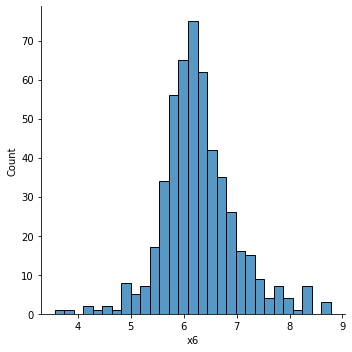

In [8]:
sns.displot(df['x6'])

## 外れ値除去

In [9]:
col = 'x6'

In [10]:
mean=df.mean()

In [11]:
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [13]:
mean[col]

6.284634387351788

In [14]:
# 標準偏差(standard devision)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [15]:
sigma[col]

0.7026171434153234

In [17]:
low = mean[col]-3*sigma[col]
low

4.176782957105817

In [18]:
high = mean[col]+3*sigma[col]
high

8.392485817597759

In [25]:
df2=df[(df[col]>low) & (df[col]<(high))]

In [23]:
len(df)

506

In [24]:
len(df2)

NameError: name 'df2' is not defined

In [26]:
len(df2)

498

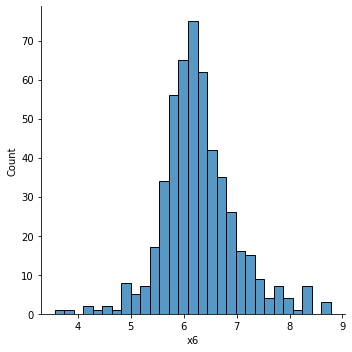

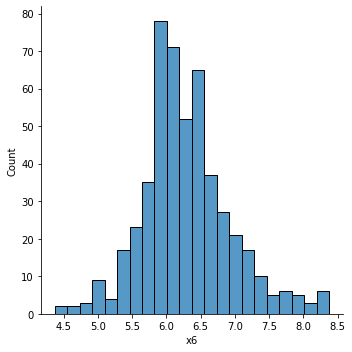

In [31]:
# 分布の比較
sns.displot(df[col])
sns.displot(df2[col])
# 4.1以下の値と8.3以上の値が消えている

In [33]:
cols=df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [35]:
_df = df
for col in cols:
    # 3σ法の上下限値を設定
    low=mean[col]-3*sigma[col]
    high= mean[col]+3*sigma[col]
    #条件での絞り込み
    _df=_df[(_df[col]>low) & (_df[col]<high)]

In [36]:
len(df)

506

In [38]:
# 3σ適応後
len(_df)

415

サンプルが減りすぎる場合の対処法

-外れ値は取り除く
-外れ値を平均もしくは中央値で埋める
-主成分分析を使って、潜在変数に変換した後に3σ法を適応⇦高度

## 入力と出力変数に分割

In [39]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [55]:
# df.iloc[行,列]
X= _df.iloc[:,:-1]
y=_df.iloc[:,-1]

## 訓練データと検証データに分割

In [41]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

## 重回帰分析

In [45]:
from sklearn.linear_model import LinearRegression

In [57]:
# モデルを宣言
model = LinearRegression()

In [58]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression()

In [59]:
# 検証←訓練データ
model.score(X_train,y_train)

0.7972109224535133

In [60]:
model.score(X_test,y_test)

0.6253776004329578

In [61]:
#過学習(オーバーフィッテング)